# Preparing objects to share with paper

In [1]:
#load packages I need
import os
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [3]:
# read in data
data_atlas = sc.read_h5ad('NRclean_clustered2.h5ad')
data_AllDC = sc.read_h5ad('20250617_AllDC_bbknn.h5ad')
data_DC2 = sc.read_h5ad('20250629_DC2_bbknn_clustered2.h5ad')
data_scvi = sc.read_h5ad('NRclean_scVI_Data.h5ad')

# Make consistent metadata columns

### Check everything has all the columns I need

In [4]:
data_AllDC

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions'

In [5]:
# For data_AllDC copy NR_annotations_simple to new column called MyeloidAPC_Subsets
data_AllDC.obs['MyeloidAPC_Subsets'] = data_AllDC.obs['NR_annotations_simple']

In [6]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 

In [7]:
# For data_DC2 copy NR_annotations_simple to new column called MyeloidAPC_Subsets
data_DC2.obs['MyeloidAPC_Subsets'] = data_DC2.obs['NR_annotations_simple']

In [8]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', '_scvi_batch', '_scvi_labels'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [9]:
# For data_scvi make MyeloidAPC_Subsets
data_scvi.obs["MyeloidAPC_Subsets"] = data_scvi.obs["NR_annotations_simple"].map(
    {
        "Tissue resident macrophage": "Tissue resident macrophage",
        "Classical monocytes": "Classical monocytes",
        "non-classical monocytes": "non-classical monocytes",
        "cDC2": "cDC2",
        "cDC1": "cDC1",
        "KI-67+ Tissue resident macrophage": "Tissue resident macrophage",
        "mregDC": "mregDC",
    }
)

In [10]:
data_scvi.obs["MyeloidAPC_Subsets"].value_counts()

MyeloidAPC_Subsets
Tissue resident macrophage    381441
Classical monocytes            57086
non-classical monocytes        29255
cDC2                           17391
cDC1                            6730
mregDC                          6120
Name: count, dtype: int64

# Remove unnecessary metadata columns from each object

## data_atlas

In [11]:
data_atlas

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

### Remove the following columns from data_atlas
'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotations', 'NR_annotations_simple', 'cancer_with_H', 'CytoTRACE_DC_Predicted_order', 'AHR(+)', 'ATF3(+)', 'BACH2(+)', 'BATF(+)', 'BHLHE40(+)', 'BHLHE41(+)', 'CREM(+)', 'DDIT3(+)', 'ELF3(+)', 'ETS1(+)', 'FOSL2(+)', 'GATA3(+)', 'HIF1A(+)', 'IKZF2(+)', 'IRF1(+)', 'IRF4(+)', 'IRF8(+)', 'JUN(+)', 'KLF12(+)', 'KLF4(+)', 'MAF(+)', 'MAFF(+)', 'NFE2(+)', 'NFKB1(+)', 'NFKB2(+)', 'NR1H3(+)', 'PRDM1(+)', 'REL(+)', 'SOX4(+)', 'TCF7L2(+)', 'keep_or_remove'

### Keep:
'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site','cancer_subtype', 'integration_id', 'ident', 'dataset_id','n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology','sample_type_major2', 'cancer_broadest','patient_treatment', 'MyeloidAPC_Subsets'


In [12]:
data_atlas.obs.drop(columns=['sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 
                             'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 
                             'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 
                             'cDC2_mregDC', 'NR_annotations', 'NR_annotations_simple', 'cancer_with_H', 'CytoTRACE_DC_Predicted_order', 'AHR(+)', 'ATF3(+)', 'BACH2(+)', 'BATF(+)', 'BHLHE40(+)', 
                             'BHLHE41(+)', 'CREM(+)', 'DDIT3(+)', 'ELF3(+)', 'ETS1(+)', 'FOSL2(+)', 'GATA3(+)', 'HIF1A(+)', 'IKZF2(+)', 'IRF1(+)', 'IRF4(+)', 'IRF8(+)', 'JUN(+)', 'KLF12(+)', 
                             'KLF4(+)', 'MAF(+)', 'MAFF(+)', 'NFE2(+)', 'NFKB1(+)', 'NFKB2(+)', 'NR1H3(+)', 'PRDM1(+)', 'REL(+)', 'SOX4(+)', 'TCF7L2(+)', 'keep_or_remove'], inplace=True)

In [13]:
data_atlas

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'MyeloidAPC_Subsets_colors', 'NR_annotations_colors', 'NR_annotations_simple_colors', 'cancer_type_broad_colors', 'clean-leiden_0.8', 'clean-leiden_0.8_colors', 'clean-subcluster', 'clean-subcluster-v2', 'clea

## data_AllDC

In [14]:
data_AllDC

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 

### Remove the following columns from data_AllDC
'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'NR_annotations_simple', 'cancer_with_H', 'keep_or_remove', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig'

### Keep:
'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site','cancer_subtype', 'integration_id', 'ident', 'dataset_id','n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology','sample_type_major2', 'cancer_broadest','patient_treatment', 'MyeloidAPC_Subsets'


In [15]:
data_AllDC.obs.drop(columns=['sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 
                             'NR_annotations_simple', 'cancer_with_H', 'keep_or_remove', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'mregDC_sig'], inplace=True)

In [17]:
data_AllDC

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'NR_annotations_simple_colors', 'dendrogram_NR_annotations_simple', 'hvg', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectiviti

## data_DC2

In [18]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 

### Remove the following columns from data_DC2
'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M','NR_annotations_simple', 'cancer_with_H', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 'DC3_sig', '2025-DC2-true_02', '2025-DC2-true_05', '2025-DC2-true_08', '2025-DC2-true_08_sub5', '2025-DC2-true_08_sub5-1', 'cDC2A_sig', 'cDC2B_sig', 'DC_CD207_Moon_sig', 'cDC2A_Minutti_sig', 'DC2_CD207_Gui_sig', 'DC2_CD1A_Cheng_sig'


### Keep:
'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site','cancer_subtype', 'integration_id', 'ident', 'dataset_id','n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology','sample_type_major2', 'cancer_broadest','patient_treatment', 'MyeloidAPC_Subsets', 'cDC2_A-B', 'cDC2_Atlas_Subclusters',


In [19]:
data_DC2.obs.drop(columns=['sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 
                           'leiden_M','NR_annotations_simple', 'cancer_with_H', 'Guimaraes_DC2_FCER1A', 'Guimaraes_DC2_AREG', 'Guimaraes_Cheng_DC2_CD207/CD1A', 'Guimaraes_DC3_CD14', 
                           'Guimaraes_DC4_FCGR3A', 'Guimaraes_DC_CXCL2', 'Cheng_DC2_CXCR4', 'Cheng_DC2_IL1B', 'Cheng_DC2_FCN1', 'Cheng_DC2_ISG15', 'Cheng_DC2_CXCL9', 'DC3_sig', 
                           '2025-DC2-true_02', '2025-DC2-true_05', '2025-DC2-true_08', '2025-DC2-true_08_sub5', '2025-DC2-true_08_sub5-1', 'cDC2A_sig', 'cDC2B_sig', 'DC_CD207_Moon_sig', 
                           'cDC2A_Minutti_sig', 'DC2_CD207_Gui_sig', 'DC2_CD1A_Cheng_sig'], inplace=True)

In [20]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'cDC2_A-B', 'cDC2_Atlas_Subclusters', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '2025-DC2-true_02', '2025-DC2-true_02_colors', '2025-DC2-true_05', '2025-DC2-true_05_colors', '2025-DC2-true_08', '2025-DC2-true_08_colors', '2025-DC2-true_08_su

## data_scvi

In [21]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', '_scvi_batch', '_scvi_labels', 'MyeloidAPC_Subsets'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

### Remove the following columns from data_scvi
'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'NR_annotations_simple', 'cancer_with_H' 


### Keep:
'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site','cancer_subtype', 'integration_id', 'ident', 'dataset_id','Technology','sample_type_major2', 'cancer_broadest','patient_treatment', , '_scvi_batch', '_scvi_labels', 'MyeloidAPC_Subsets'


In [22]:
data_scvi.obs.drop(columns=['sample_type', 'cancer_type', 'patient_id', 'sample_id', 'sample_type_major', 'NR_annotations_simple', 'cancer_with_H','_scvi_batch','_scvi_labels'], inplace=True)

In [23]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# Visualise each object and check it appears as in manuscript - set colours

In [27]:
data_atlas

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'MyeloidAPC_Subsets_colors', 'NR_annotations_colors', 'NR_annotations_simple_colors', 'cancer_type_broad_colors', 'clean-leiden_0.8', 'clean-leiden_0.8_colors', 'clean-subcluster', 'clean-subcluster-v2', 'clea

In [25]:
# Set colours for MyeloidAPC_Subsets plot:
data_atlas.uns["MyeloidAPC_Subsets_colors"] = ['#d62728', '#279e68', '#e377c2', '#aa40fc', '#8c564b', '#5fa6e6']  

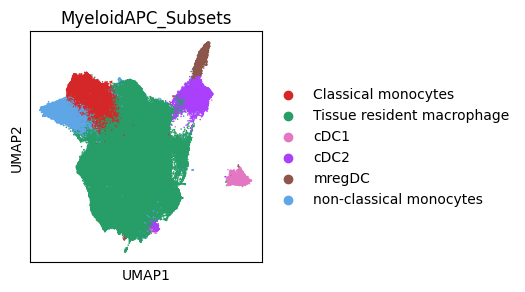

In [29]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_atlas, color=["MyeloidAPC_Subsets"], ncols=1, size=5)

In [30]:
data_AllDC

AnnData object with n_obs × n_vars = 29887 × 1746
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'NR_annotations_simple_colors', 'dendrogram_NR_annotations_simple', 'hvg', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectiviti

In [32]:
# Set colours for MyeloidAPC_Subsets plot:
data_AllDC.uns["MyeloidAPC_Subsets_colors"] = ['#e377c2', '#aa40fc', '#8c564b']  

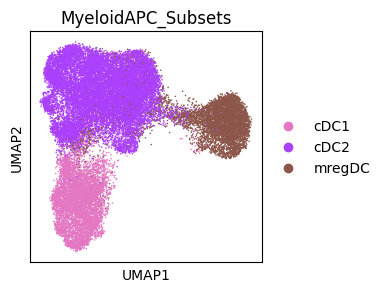

In [33]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_AllDC, color=["MyeloidAPC_Subsets"], ncols=1, size=5)

## Add cDC2A/cDC2B annotations to data_AllDC

In [35]:
#copy metadata column
data_AllDC.obs['MyeloidAPC_Subsets_with_cDC2AB'] = data_AllDC.obs['MyeloidAPC_Subsets']

In [ ]:
#define cells in data_DC2
common_cells = data_DC2.obs_names.intersection(data_AllDC.obs_names)

In [39]:
# Now update label for only those cells
data_AllDC.obs.loc[common_cells, 'MyeloidAPC_Subsets_cDC2AB'] = data_DC2.obs.loc[common_cells, 'cDC2_A-B']

In [40]:
# Preview result
data_AllDC.obs[['MyeloidAPC_Subsets', 'MyeloidAPC_Subsets_cDC2AB']].head()

,MyeloidAPC_Subsets,MyeloidAPC_Subsets_cDC2AB
GSE215120_AM1_AAATGCCCAGAGCCAA-1,cDC2,cDC2B
GSE215120_AM1_ACACTGATCCACTGGG-1,cDC2,cDC2B
GSE215120_AM1_ACAGCCGCAAACCTAC-1,cDC2,cDC2B
GSE215120_AM1_ACCAGTAAGACTGGGT-1,cDC1,NaN
GSE215120_AM1_ACGTCAACAAGGACTG-1,cDC1,NaN


In [34]:
data_DC2

AnnData object with n_obs × n_vars = 16643 × 2001
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'site', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'Technology', 'sample_type_major2', 'cancer_broadest', 'patient_treatment', 'cDC2_A-B', 'cDC2_Atlas_Subclusters', 'MyeloidAPC_Subsets'
    var: 'name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '2025-DC2-true_02', '2025-DC2-true_02_colors', '2025-DC2-true_05', '2025-DC2-true_05_colors', '2025-DC2-true_08', '2025-DC2-true_08_colors', '2025-DC2-true_08_su

In [ ]:
# export object: 
data_atlas.write_h5ad("MyeloidAPC_Atlas_Share.h5ad", compression="gzip")